### 0. Data loading

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data  =  pd.read_csv('data/sentiment_analysis.csv')

In [4]:
data.head(10)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
5,6,1,iPhone software update fucked up my phone big ...
6,7,0,Happy for us .. #instapic #instadaily #us #son...
7,8,0,New Type C charger cable #UK http://www.ebay.c...
8,9,0,Bout to go shopping again listening to music #...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...


In [5]:
print("shape",data.shape)
print("duplicated count",data.duplicated().sum())
print("null count",data.isnull().sum())

shape (7920, 3)
duplicated count 0
null count id       0
label    0
tweet    0
dtype: int64


### 1. Text Preprocessing

In [6]:
import re
import string
import nltk

#### 1) convert uppercase to lowercase

In [7]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))   

In [8]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

#### 2. Removing Punctuation 


In [9]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"]= data["tweet"].apply(remove_punctuations)

In [11]:
data["tweet"].head(5)

0    fingerprint pregnancy test httpsgooglh1mfqv an...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

#### 3) remove numbers

In [12]:
data["tweet"] = data['tweet'].str.replace('\\d+', '', regex=True)

In [13]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app httpb...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

#### 4. download nltk stopwords

In [14]:
nltk.download('stopwords',download_dir="data")

[nltk_data] Downloading package stopwords to data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
with  open("data/corpora/stopwords/english",'r') as file:
      sw = file.read().splitlines()

In [16]:
sw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

#### 5. remove stopwords 

In [17]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [18]:
data["tweet"].head(5)

0    fingerprint pregnancy test httpsgooglhmfqv and...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

#### 6. Stemming

In [19]:
from nltk.stem import PorterStemmer
ps  = PorterStemmer() 

In [20]:
data["tweet"]  =  data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [21]:
data["tweet"].head(5)

0    fingerprint pregnanc test httpsgooglhmfqv andr...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [22]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test httpsgooglhmfqv andr...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### 2. Building Vacabulary

In [23]:
from collections import Counter
vocab = Counter()

In [24]:
for sentence in data["tweet"]:
    vocab.update(sentence.split())

In [25]:
print("vocab size :",len(vocab))
print("data size :",len(data))

vocab size : 19989
data size : 7920


In [26]:
## when vocab is large,than the data lenght not good for training
tokens = [key for key in vocab if vocab[key] > 10]

In [27]:
print("token size :",len(tokens))

token size : 1154


In [28]:
## save vocabulary 

def save_vocab(lines,filename):
    data = "\n".join(lines)
    file = open(filename,"w",encoding="utf-8")
    file.write(data)
    file.close()
            
save_vocab(tokens,"data/vocab.txt")

### 3. Split dataset

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = data['tweet']
y = data['label']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### 4. Vectorization 

In [32]:
def vectorizer(ds,vocabulary):
    vectorized_list = []
    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
                if vocabulary[i] in sentence.split():
                    sentence_list[i] = 1
        
        vectorized_list.append(sentence_list)   
    
    vectorized_new_list =np.asarray(vectorized_list,dtype=np.float32)
    return vectorized_new_list

In [33]:
vectorized_x_train = vectorizer(X_train, tokens)
vectorized_x_test = vectorizer(X_test, tokens)

In [34]:
y_train.value_counts()

label
0    4717
1    1619
Name: count, dtype: int64

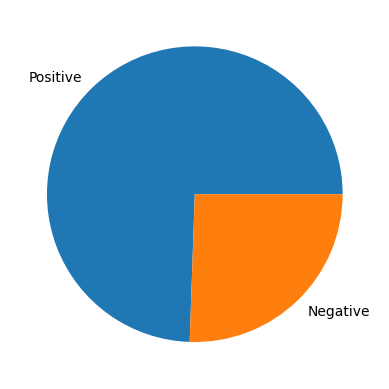

In [35]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### 5. Handle imbalanced dataset 

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
smote = SMOTE()

In [38]:
vectorized_x_train_smote,y_train_smote = smote.fit_resample(vectorized_x_train,y_train)

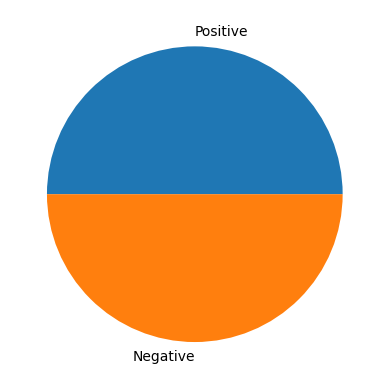

In [39]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### 6. Model Training and Evaluation 

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [41]:
def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

#### 6.1 Logistic Regression 

In [42]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)
y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred) 

Training Scores:
	Accuracy = 0.943
	Precision = 0.92
	Recall = 0.971
	F1-Score = 0.945
Testing Scores:
	Accuracy = 0.867
	Precision = 0.697
	Recall = 0.853
	F1-Score = 0.767


#### 6.2 Decision Tree 

In [43]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.819
	Precision = 0.632
	Recall = 0.705
	F1-Score = 0.667


#### 6.3 Random Forest 

In [44]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.869
	Precision = 0.748
	Recall = 0.742
	F1-Score = 0.745


#### 6.4 Support Vector Machine

In [45]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.979
	Precision = 0.962
	Recall = 0.996
	F1-Score = 0.979
Testing Scores:
	Accuracy = 0.871
	Precision = 0.72
	Recall = 0.813
	F1-Score = 0.764


#### 6.5 Naive Bayes 

In [46]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)


Training Scores:
	Accuracy = 0.909
	Precision = 0.87
	Recall = 0.96
	F1-Score = 0.913
Testing Scores:
	Accuracy = 0.862
	Precision = 0.669
	Recall = 0.919
	F1-Score = 0.774


### 7. Export Selected Model

In [47]:
import pickle

with open('data/model.pickle', 'wb') as file:
    pickle.dump(lr, file)